## Lab 5 Solving a binary classification problem using a perceptron and a FNN (MLP)

The dataset used can be found at https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database  

Context of the dataset:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Content of the dataset:
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Read a data file and save the input data into a data frame. The data file should be saved in the current directory.

In [1]:
# Load dataset and import required packages
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/IntroToAI/Lab5

/content/drive/MyDrive/IntroToAI/Lab5


In [10]:

'''
Task: Import pandas and give it an alias as pd so that we can use pd in code for pandas. Pandas is a powerful data manipulation and analysis library in Python.
'''
import pandas as pd


'''
Task: Read a CSV file (the target csv file) into a DataFrame, called `df`, using pandas' read_csv function. The read_csv function loads the data from the CSV file into a pandas DataFrame, which is a tabular data structure with labeled axes.
'''
df = pd.read_csv("diabetes.csv")

In [23]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
# Display the dimensions of the dataframe df using shape() method
df.shape

(768, 9)

In [12]:
# Display the first 5 rows of this dataframe df using head() method
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
# Separate the dataset into input X and output y
'''
Task: Separate the dataset into inputs and output parts and save the inputs in a dataframe `X` and output in a series `y`.
Use drop() method to drop the `Outcome`column and keep the other columns as the inputs `X`.
Extract the `Outcome` column as the output `y`.
'''

#columns_to_drop = ['Outcome', 'BloodPressure']
X = df.drop('Outcome', axis=1) #drop() function expect the first argument to be either a single label or a list of labels
#If I want to drop more than two columns, the first argument must be a list ['Outcome', 'BloodPressure'] or columns_to_drop when columns_to_drop = ['Outcome', 'BloodPressure']
y = df['Outcome']


In [41]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [46]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
# Import required library for creating train and test datasets
"""
Task: Import the `train_test_split()` function from the `model_selection` module in the `sklearn` library.
Note: To import a function from a module of a library, we use the convention: from library-name.module-name import function-name.
"""
from sklearn.model_selection import train_test_split


In [70]:
# Create the train and test datasets using function train_test_split()
'''
Task: Split the dataset into train and test datasets using method train_test_split() with four parameters:
      (1) X of datasetas,(2) y of dataset, (3) test_size = 0.2 (for 80:20 ratio) and (4) random_state = 42 (Popular integer random seeds are 0 and 42)
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(X_train.values)

In [ ]:
X_test

In [ ]:
y_train

In [62]:
print(y_test.values)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0]


### Set aside two futureSample dataset

In [73]:
# Create a future sample set from the test dataset
futureSample_data = X_test[-2:] #last two rows
futureSample_label = y_test[-2:] #last two labels

In [74]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [75]:
futureSample_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
296,2,146,70,38,360,28.0,0.337,29
462,8,74,70,40,49,35.3,0.705,39


In [76]:
futureSample_label

296    1
462    0
Name: Outcome, dtype: int64

In [77]:
# Adjust the test dataset after taking the future sample set
X_test = X_test[:-2] #excluding the last two samples
y_test = y_test[:-2]

Two models are considered in this notebook: model 1 is the Perceptron model; Model 2 is a feedforward neural neteork (FNN).
Select a model to develop a classifier using a perceptron model (model_option = 1) or a FNN model (model_option = 2).

In [78]:
model_option = int(input("Choose a model, 1 -- perceptron model and 2 -- Feedforward neural network, \n your choice:"))

Choose a model, 1 -- perceptron model and 2 -- Feedforward neural network, 
 your choice:1


The following are the key steps in developing a learning model:
* Preparation: Define a train dataset, a test dataset and a future dataset
* Define a Model: Use TensorFlow’s APIs to define the architecture of a machine learning model.
* Compile the Model: Specify the optimizer, loss function, and metrics (except for Perceptron Model)
* Train the Model: Use your data to train the model by adjusting its parameters.
* Test and evaluate the Model: Test the model’s performance on validation or test data.

In [83]:
from tensorflow.keras.models import load_model

if (model_option == 1): # Perceptron model can be found at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
    # Define a model
    '''
    Task: import Perceptron from sklearn.linear_model for using Perceptron model
    '''
    from sklearn.linear_model import Perceptron


    '''
    Task: Define a Perceptron model, called `model`, using the `Perceptron` class constructor `Perceptron()` with arguments: penalty = 'elasticnet' and l1_ratio = 0
    '''
    model = Perceptron(penalty='elasticnet', l1_ratio=0)


    '''
    Task: train the Perceptron using the method fit() in the created model with the train dataset
    '''
    model.fit(X_train, y_train)


    print(model.score(X_train,y_train))
    '''
    Task: predict the y values of test set using the trained model using method predict() from the model
    '''
    y_preds = model.predict(X_test)


    print (y_preds)

    # Save the trained model
    import joblib
    joblib.dump(model, 'my_model.pkl')

    # Load a pre-trained model
    loaded_model = joblib.load('my_model.pkl')


elif (model_option == 2):

    import tensorflow as tf
    from keras.layers import Dense, Input

    # Define parameters to define the model. You can change these parameters to get different FNN models to compare their results
    input_dim   = X_train.shape[1]
    n_neurons_1   = 512
    n_neurons_2   = 256
    n_neurons_3   = 100
    output_dim = 1

    # Define parameters used in running the training process. You can change these parameters to alter the training process
    epochNo      =  100
    batchSize = 16

    # Create the model
    model = tf.keras.Sequential()

    '''
    Task: Add one Input layer using method add() with the parameter: shape(input_dim,:)

    '''
    "Add your code here"
    model.add(Input(shape=(input_dim,)))


    '''
    Task: Add one Dense layer using method add() from model with the parameter: n_neurons_1 and activation='relu'
    '''
    "Add your code here"
    model.add(Dense(n_neurons_1, activation='relu'))

    '''
    Task: Add two more Dense layers using method add() from model with the parameters: n_neurons_2 and n_neurons_3 and activation='relu'
    '''
    "Add your code here"
    model.add(Dense(n_neurons_2, activation='relu'))
    model.add(Dense(n_neurons_3, activation='relu'))

    '''
    Task: Add one Dense layer using method add() from model with the parameters: output_dim and activation = tf.keras.activations.sigmoid
    '''
    "Add your code here"
    model.add(Dense(output_dim, activation=tf.keras.activations.sigmoid))

    print ('The model layers is {}: '.format(len(model.layers)))    # The layers in a NN model can be accessed by attribute "layers"

    '''
    Task: Compile the model using method compile() from the model with the parameters: loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']
    '''
    "Add your code here"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    '''
    Task: Train the model using method fit() from the model with the parameters:X_train, y_train, epochs=epochNo, batch_size=batchSize, verbose=0
    '''
    "Add your code here"

    model.fit(X_train, y_train, epochs=epochNo, batch_size=batchSize, verbose=0)

    '''
    Task: Evaluate the model using method evaluate() from the model with the test set and verbose being 0 (You also can try verbose =1,2, or 3 to see the output difference
    '''
    '''
    Task: Predict the output of the test set using method predict() from the model
    '''
    predictions = model.predict(X_test)


    # Generate class labels based on predictions with a threshold of 0.5
    y_preds = (predictions > 0.5)*1

    '''
    Task: Evaluate the model using method evaluate() from the model with the test set and verbose being 0 (You also can try verbose =1,2, or 3 to see the output difference)
    '''
    scores = model.evaluate(X_test, y_test, verbose=0)


    print('The evaluation scores are {}'.format(scores))

    # Save a trained model
    model.save("model.h5")

    from tensorflow.keras.models import load_model

    # Load a pre-trained model named 'model.h5' in the current directory
    loaded_model = load_model ('model.h5')

    # Display the properties of this loaded model
    loaded_model.summary()
else: print ("invalid model option")


0.6644951140065146
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [84]:
# import metrics from sklearn for calculation of evaluation metrics, such as accuracy, precision, recall and f1-score
from sklearn import metrics

In [89]:
# Calculate accuracy of test set using method accuracy_score()
'''
Task: calcualte accuracy of test set using method accuracy_score() from metrics
'''
accuracy_test = metrics.accuracy_score(y_test, y_preds)

print (accuracy_test)

0.6513157894736842


In [90]:
# Calculate precision of test set using method presion_score() from metrics
'''
Task: Calculate precision of test set using method presion_score() from metrics
'''
precision_test = metrics.precision_score(y_test, y_preds)

print(precision_test)

0.5294117647058824


In [92]:
# Calculate recall of test set using method recall_score()
'''
Task: Calculate recall of test set using method recall_score() from metrics
'''
recall_test = metrics.recall_score(y_test, y_preds)

print(recall_test)

0.16666666666666666


In [93]:
# Calculate f1 score of test set using method f1_score()
'''
Task: Calculate f1 score of test set using method f1_score() from metrics
'''
f1_score_test = metrics.f1_score(y_test, y_preds)

print(f1_score_test)

0.2535211267605634


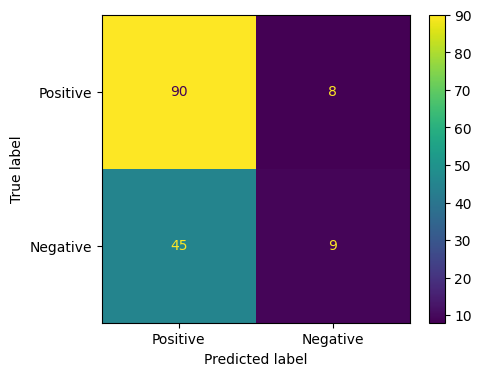

In [94]:
# Display the confusion matrix and import required package

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

fig, ax = plt.subplots(figsize = (5,4), dpi = 100)
cm = confusion_matrix(y_test, y_preds)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["Positive", "Negative"])
cmp.plot(ax=ax)

In [95]:
# Display the evaluation report
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.67      0.92      0.77        98
           1       0.53      0.17      0.25        54

    accuracy                           0.65       152
   macro avg       0.60      0.54      0.51       152
weighted avg       0.62      0.65      0.59       152



### Predict the class for the data samples in the future sample set


Use the loaded model (loaded_model) and futureSample_data to simulate a real-world application scenario

In [96]:
if (model_option ==1):
    # import joblib if it has not been imported before by uncommented the next line
    # import joblib

    # Load a pre-trained model named 'my_model.pkl
    loaded_model = joblib.load('my_model.pkl')
elif (model_option==2):
    from tensorflow.keras.models import load_model

    # Load a pre-trained model named 'model.h5' in the current directory
    loaded_model = load_model ('model.h5')

    # Display the properties of this loaded model
    loaded_model.summary()
else: print("Invalid model option")

In [99]:
if (model_option == 1):
    '''
    Task: predict the output for the future samples using method predict() from the loaded model, loaded_model
    '''
    y_preds_val = loaded_model.predict(futureSample_data)

    print("The predicated classes are {} vs the true classes are {}".format(y_preds_val, futureSample_label.values))
else:
    '''
    Task: predict the output for the future samples using method predict() from the loaded model, loaded_model
    '''
    predictions_val = loaded_model.predict(futureSample_data)

    # Generate the class labels based on predictions_val with a threshold of 0.5
    y_preds_val = (predictions_val > 0.5)*1     # threshold is 0.5
    print("The predicated classes are {} vs the true classes are {}".format(y_preds_val, futureSample_label.values))

The predicated classes are [0 0] vs the true classes are [1 0]
